# Imports

In [1]:
import numpy as np
import pandas as pd
import psycopg2 as pg
import seaborn as sns
import pandas.io.sql as psql

# Lib para não mostrar warnings de melhorias futuras (sugestão de novos comandos) das bibliotecas\n",
import warnings
warnings.filterwarnings('ignore')


from matplotlib import pyplot as plt


In [2]:
def jupyter_settings():

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 8]
    plt.rcParams['font.size'] = 24

    sns.set()

In [3]:
jupyter_settings()

# Load Data

## Connect DB

In [4]:
# Credentials
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'




In [5]:
# Conexão com o DB

#def connect_db(host, port, db, user, passw):
#    conn = pg.connect(host = host,
#                      port = port,
#                      database = db,
#                      user = user,
#                      password = passw)
#    return conn

In [6]:
# Conexão com o DB
conn = pg.connect(host = host,
                  port = port,
                  database = database,
                  user = username,
                  password = pwd)

## 1.0 Schema Query

In [7]:
#connect_db('comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com', 5432, 'comunidadedsdb', 'member', 'cdspa' )


In [8]:
# Criação do cursor que irá apontar para o DB

#connect_db('comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com', 5432, 'comunidadedsdb', 'member', 'cdspa' )

cursor = conn.cursor()

# Query para identificação dos schemas dentro do DB
query_schema = """
    SELECT nspname
    FROM pg_catalog.pg_namespace

"""
cursor.execute(query_schema)

# Método para trazer dados
record = cursor.fetchall()

# Importante fechar o cursor e a conexão
#cursor.close()
#conn.close()

# Show results
record


[('pg_toast',),
 ('pg_temp_1',),
 ('pg_toast_temp_1',),
 ('pg_catalog',),
 ('information_schema',),
 ('public',),
 ('pa004',),
 ('pg_temp_4',),
 ('pg_toast_temp_4',),
 ('pa005',),
 ('pg_temp_9',),
 ('pg_toast_temp_9',)]

## 2.0 Table Query

In [9]:
# Criação do cursor que irá apontar para o DB
cursor = conn.cursor()

# Query para identificação das tabelas dentro do schema
query_tables = """
    SELECT tablename
    FROM pg_tables
    WHERE schemaname='pa004'

"""
cursor.execute(query_tables)

# Método para trazer dados
record = cursor.fetchall()

# Importante fechar o cursor e a conexão
#cursor.close()
#conn.close()

# Show results
record

[('users',), ('vehicle',), ('insurance',)]

## 3.0 Collect Data using Psycopg2

In [10]:
# Criação do cursor que irá apontar para o DB
cursor = conn.cursor()

# Query para buscar dados na tabela
query_table_users = """
    SELECT *
    FROM pa004.users u
    WHERE u.age > 44

"""
cursor.execute(query_table_users)

# Método para trazer dados
record = cursor.fetchall()

# Importante fechar o cursor e a conexão
#cursor.close()
#conn.close()

# Show results
record

[(2, 'Male', 76, 3.0, 26.0),
 (3, 'Male', 47, 28.0, 26.0),
 (8, 'Female', 56, 28.0, 26.0),
 (11, 'Female', 47, 35.0, 124.0),
 (14, 'Male', 76, 28.0, 13.0),
 (15, 'Male', 71, 28.0, 30.0),
 (20, 'Female', 60, 33.0, 124.0),
 (21, 'Male', 65, 28.0, 124.0),
 (22, 'Male', 49, 28.0, 124.0),
 (27, 'Female', 51, 28.0, 124.0),
 (30, 'Male', 57, 11.0, 157.0),
 (32, 'Male', 79, 28.0, 26.0),
 (33, 'Female', 48, 28.0, 122.0),
 (37, 'Male', 71, 8.0, 19.0),
 (39, 'Male', 45, 8.0, 124.0),
 (40, 'Male', 72, 41.0, 152.0),
 (42, 'Female', 54, 28.0, 122.0),
 (46, 'Male', 56, 28.0, 124.0),
 (48, 'Male', 51, 26.0, 22.0),
 (50, 'Male', 48, 3.0, 124.0),
 (53, 'Female', 49, 3.0, 152.0),
 (54, 'Male', 78, 41.0, 26.0),
 (58, 'Male', 54, 28.0, 26.0),
 (59, 'Female', 62, 48.0, 15.0),
 (61, 'Male', 49, 8.0, 156.0),
 (63, 'Female', 62, 28.0, 26.0),
 (64, 'Male', 58, 19.0, 26.0),
 (66, 'Female', 59, 30.0, 26.0),
 (68, 'Male', 60, 28.0, 124.0),
 (69, 'Male', 63, 28.0, 124.0),
 (70, 'Female', 50, 41.0, 26.0),
 (74, 'Mal

In [11]:
data = pd.DataFrame(record)
data.head()

,0,1,2,3,4
0,2,Male,76,3.0,26.0
1,3,Male,47,28.0,26.0
2,8,Female,56,28.0,26.0
3,11,Female,47,35.0,124.0
4,14,Male,76,28.0,13.0


## 4.0 Collect data using Pandas

In [12]:
query_users_columns = """ SELECT * FROM pa004.users """
query_vehicle_columns = """ SELECT * FROM pa004.vehicle """
query_insurance_columns = """ SELECT * FROM pa004.insurance """


In [13]:
users_col = psql.read_sql(query_users_columns, conn)
print(users_col)
vehicle_col = psql.read_sql(query_vehicle_columns, conn)
print(vehicle_col)
insurance_col = psql.read_sql(query_insurance_columns, conn)
print(insurance_col)

            id  gender  age  region_code  policy_sales_channel
0            1    Male   44         28.0                  26.0
1            2    Male   76          3.0                  26.0
2            3    Male   47         28.0                  26.0
3            4    Male   21         11.0                 152.0
4            5  Female   29         41.0                 152.0
...        ...     ...  ...          ...                   ...
381104  381105    Male   74         26.0                  26.0
381105  381106    Male   30         37.0                 152.0
381106  381107    Male   21         30.0                 160.0
381107  381108  Female   68         14.0                 124.0
381108  381109    Male   46         29.0                  26.0

[381109 rows x 5 columns]
            id  driving_license vehicle_age vehicle_damage
0            1                1   > 2 Years            Yes
1            2                1    1-2 Year             No
2            3                1   > 2 Ye

In [14]:
# Query para Juntar todas as tabelas e mostrar uma tabela só
query_table_users = """
    SELECT *
    FROM pa004.users u LEFT JOIN pa004.vehicle   v on (u.id = v.id)
                       LEFT JOIN pa004.insurance i on (u.id = i.id)
"""

df = psql.read_sql(query_table_users, conn)
df


,id,gender,age,region_code,policy_sales_channel,id,driving_license,vehicle_age,vehicle_damage,id,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,7,1,< 1 Year,Yes,7,0,23367.0,249,0
1,13,Female,41,15.0,14.0,13,1,1-2 Year,No,13,1,31409.0,221,0
2,18,Female,25,35.0,152.0,18,1,< 1 Year,No,18,1,46622.0,299,0
3,31,Female,26,8.0,160.0,31,1,< 1 Year,No,31,0,2630.0,136,0
4,39,Male,45,8.0,124.0,39,1,1-2 Year,Yes,39,0,42297.0,264,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381070,Male,24,8.0,152.0,381070,1,< 1 Year,No,381070,1,38254.0,127,0
381105,381079,Female,58,28.0,26.0,381079,1,1-2 Year,Yes,381079,0,39740.0,170,0
381106,381082,Female,75,28.0,26.0,381082,1,1-2 Year,No,381082,1,51619.0,80,0
381107,381097,Female,49,10.0,26.0,381097,1,1-2 Year,Yes,381097,0,34541.0,44,0


In [15]:
# Exclusão dos ID's duplicados no JOIN
df1 = pd.read_sql(query_table_users, conn)
df1 = df1.drop(df.columns[[5,9]], axis = 1)
df1

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,24,8.0,152.0,1,< 1 Year,No,1,38254.0,127,0
381105,Female,58,28.0,26.0,1,1-2 Year,Yes,0,39740.0,170,0
381106,Female,75,28.0,26.0,1,1-2 Year,No,1,51619.0,80,0
381107,Female,49,10.0,26.0,1,1-2 Year,Yes,0,34541.0,44,0


# 5.0 Data Description

In [16]:
df2 = df1.copy()

In [17]:
df2.shape

(381109, 11)

In [18]:
df2.dtypes

gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [19]:
df2.isna().sum()

gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

In [20]:
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 1 if x == '< 1 Year' else 2 if x == '> 2 Years' else 12)
df2['vehicle_age'] = df2['vehicle_age'].astype('int64')


df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)
df2['vehicle_damage'] = df2['vehicle_damage'].astype('int64')

In [21]:
df2.sample(10)

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
292034,Male,45,3.0,124.0,1,12,0,0,20196.0,36,0
208269,Male,21,50.0,160.0,1,1,0,0,34868.0,71,0
330752,Female,36,41.0,26.0,1,12,1,0,34321.0,233,1
173720,Male,27,5.0,152.0,1,1,1,0,28384.0,155,0
104577,Male,24,9.0,152.0,1,1,0,1,42944.0,120,0
53973,Male,29,15.0,152.0,1,1,1,0,27839.0,171,0
84568,Male,24,8.0,152.0,1,1,0,1,39548.0,180,0
125750,Male,40,28.0,154.0,1,12,1,0,34825.0,251,1
189383,Male,23,32.0,152.0,1,1,0,1,50533.0,206,0
155676,Male,26,35.0,152.0,1,1,1,1,36158.0,198,0


In [22]:
df2.dtypes

gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age               int64
vehicle_damage            int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [23]:
num_atrib = df2.select_dtypes(include = ['int64', 'float64'])
cat_atrib = df2.select_dtypes(exclude = ['int64', 'float64'])


In [24]:
# Central Tendency
ct1 = pd.DataFrame(round(num_atrib.apply(np.mean), 2)).T
ct2 = pd.DataFrame(num_atrib.apply(np.median)).T

# Dispersion (std, min, max, range, skew, kurtosis)
d1 = pd.DataFrame(round(num_atrib.apply(np.std), 2)).T
d2 = pd.DataFrame(round(num_atrib.apply(np.min), 2)).T
d3 = pd.DataFrame(round(num_atrib.apply(np.max), 2)).T
d4 = pd.DataFrame(round(num_atrib.apply(lambda x: x.max() - x.min()), 2)).T
d5 = pd.DataFrame(round(num_atrib.apply(lambda x: x.skew()), 2)).T
d6 = pd.DataFrame(round(num_atrib.apply(lambda x: x.kurtosis()), 2)).T

df21 = pd.concat([d2, ct1, d3, ct2, d1, d4, d5, d6]).T
df21.columns=['Min', 'Media','Max','Mediana','STD','Range','Skew','Kurtosis']
df21

,Min,Media,Max,Mediana,STD,Range,Skew,Kurtosis
age,20.0,38.82,85.0,36.0,15.51,65.0,0.67,-0.57
region_code,0.0,26.39,52.0,28.0,13.23,52.0,-0.12,-0.87
policy_sales_channel,1.0,112.03,163.0,133.0,54.20,162.0,-0.90,-0.97
driving_license,0.0,1.00,1.0,1.0,0.05,1.0,-21.60,464.35
vehicle_age,1.0,6.82,12.0,12.0,5.45,11.0,-0.11,-1.98
vehicle_damage,0.0,0.50,1.0,1.0,0.50,1.0,-0.02,-2.00
previously_insured,0.0,0.46,1.0,0.0,0.50,1.0,0.17,-1.97
annual_premium,2630.0,30564.39,540165.0,31669.0,17213.13,537535.0,1.77,34.00
vintage,10.0,154.35,299.0,154.0,83.67,289.0,0.00,-1.20
response,0.0,0.12,1.0,0.0,0.33,1.0,2.30,3.30


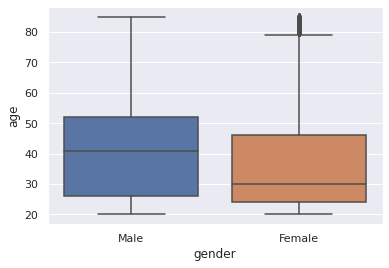

In [25]:
#ax = sns.countplot(cat_atrib['gender'])


ax = sns.boxplot(x='gender', y='age', data=df2)
